**WINE QUALITY PREDICTION**

In [ ]:
pip install pandas scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the red wine dataset
red_wine_data = pd.read_csv("/content/winequality-red.csv", delimiter=";")
# Load the white wine dataset
white_wine_data = pd.read_csv("/content/winequality-white.csv", delimiter=";")

# Combine the datasets if you want to predict quality for both red and white wines
wine_data = pd.concat([red_wine_data, white_wine_data], axis=0)

# Split the data into features (X) and target (y)
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.3707512307692308
R-squared: 0.49799896486302864


IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

LOADING OF DATASET

In [ ]:
# Load the red wine dataset
red_wine_data = pd.read_csv("/content/winequality-red.csv", delimiter=";")
# Load the white wine dataset
white_wine_data = pd.read_csv("/content/winequality-white.csv", delimiter=";")


COMBINING BOTH DATASETS

In [ ]:
# Combine the datasets if you want to predict quality for both red and white wines
wine_data = pd.concat([red_wine_data, white_wine_data], axis=0)


In [ ]:
# Display the first few rows of the combined dataset
print("Combined Wine Quality Dataset:")
print(wine_data.head())

Combined Wine Quality Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8 

CHECK FOR NULL VALUES

In [ ]:
print("\nNull Values in the Dataset:")
print(wine_data.isnull().sum())


Null Values in the Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


DATA PREPROCESSING

In [ ]:
# Data preprocessing: Convert quality to binary (good: 1, not good: 0) for simplicity
# Let's consider wines with quality greater than or equal to 7 as "good" wines
y = (y >= 7).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

APPLYING ML MODELS

In [ ]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Model Evaluation:
Mean Squared Error: 0.08185469230769231
R-squared: 0.47619642099842485


PLOTS

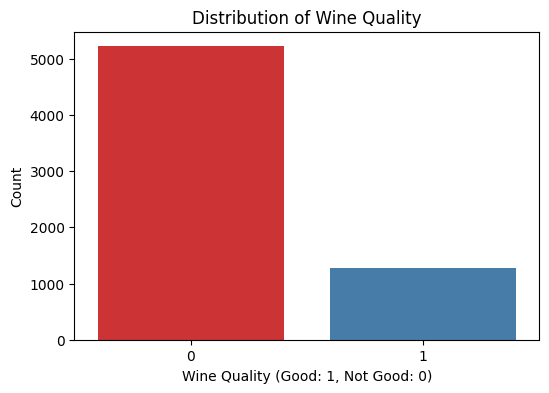

In [ ]:
# Plot the distribution of the target variable (wine quality)
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="Set1")
plt.xlabel("Wine Quality (Good: 1, Not Good: 0)")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality")
plt.show()

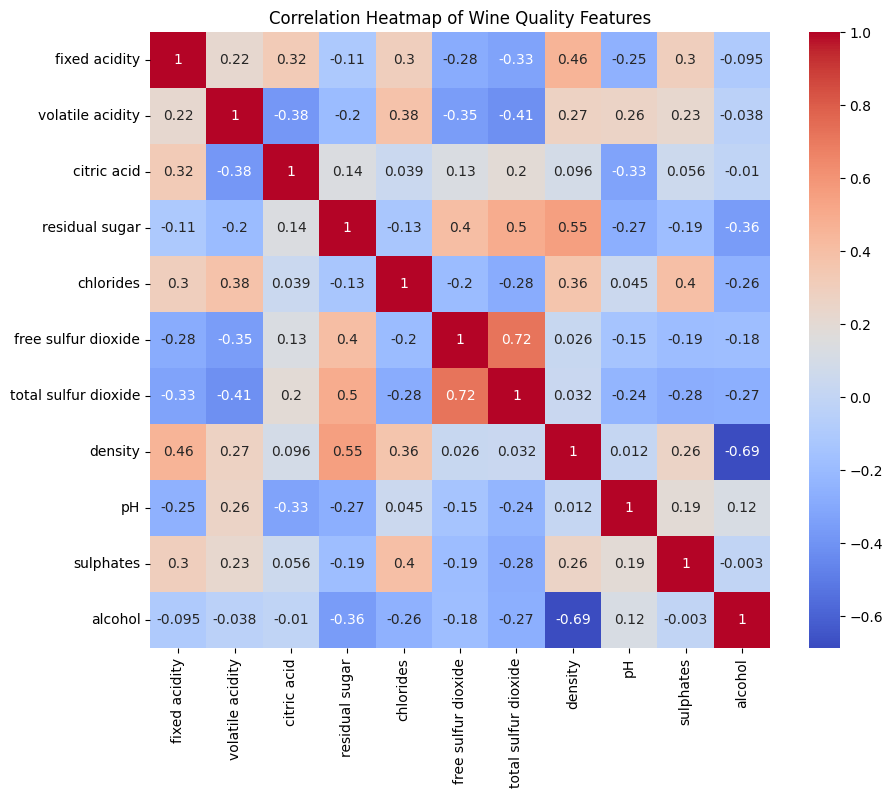

In [ ]:
# Plot a heatmap to visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Wine Quality Features")
plt.show()